In [1]:
# Class IT-533
# Summer 2020
# Final- Suicide Rates Overview 1985 to 2016 from Kaggle
# By Wei Geng(David)
# Created on: 08/07/2020
# Honor Code: “I have neither given or received, nor have I tolerated others' use of unauthorized aid.”

In [2]:
# Convert to pandas DataFrame
import io
import numpy as np
import pandas as pd
from scipy import stats
master_df = pd.read_csv('https://raw.githubusercontent.com/intelspeedstep/AMOD533/master/master.csv')
master_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
# output the data attributes and its datatypes, plus the shape of the dataset
print(master_df.info(verbose=True))
print(master_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB
None
(27820, 12)


<font color=blue size=5> Question #1 Is there a class attribute in you dataset? if not, which class attribute who there be? For what purpose might someone be interested in this class attribute? (10 Points)</font>

Answer: Yes, there are four columns are class variables. 1) country 2) sex 3) age and 4)generation
If someone is interest in the suicide rate certain country, they can use the country variable for filter for deeper analysis or,
they want to see if there is any disparities in suicide rate between different gender, age and generation bands. 
For those directions of protential studies, they have to use the class attributes listed above.

In [40]:
# Check the shape and columns of the master dataset
print("Columns names are : \n", master_df.columns)
master_object=master_df.select_dtypes('object')
master_object=master_object.drop([' gdp_for_year ($) ','country-year'], axis =1)
print("Shape of the dataframe: ",master_object.shape)
master_object.head()

Columns names are : 
 Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')
Shape of the dataframe:  (27820, 4)


,country,sex,age,generation
0,Albania,male,15-24 years,Generation X
1,Albania,male,35-54 years,Silent
2,Albania,female,15-24 years,Generation X
3,Albania,male,75+ years,G.I. Generation
4,Albania,male,25-34 years,Boomers


In [5]:
# Below is to check the value counts and percent of each of the class attributes
for column_name in master_object.columns:
    print("Value counts of the variable {}".format(column_name),":")
    print(master_object[column_name].value_counts())
    print(master_object[column_name].value_counts(normalize=True),'\n')

Value counts of the variable country :
Netherlands               382
Iceland                   382
Austria                   382
Mauritius                 382
Colombia                  372
                         ... 
Bosnia and Herzegovina     24
Cabo Verde                 12
Dominica                   12
Macau                      12
Mongolia                   10
Name: country, Length: 101, dtype: int64
Netherlands               0.013731
Iceland                   0.013731
Austria                   0.013731
Mauritius                 0.013731
Colombia                  0.013372
                            ...   
Bosnia and Herzegovina    0.000863
Cabo Verde                0.000431
Dominica                  0.000431
Macau                     0.000431
Mongolia                  0.000359
Name: country, Length: 101, dtype: float64 

Value counts of the variable sex :
male      13910
female    13910
Name: sex, dtype: int64
male      0.5
female    0.5
Name: sex, dtype: float64 

Value counts 

## <font color=blue size=4> Question #2 List the Minimum, Mean, Median, Mode, Q1, Q3 and Standard Deviation for Suicide/ 100K and age for cuba and the Russian Federation. Which category has the smaller standard Deviation? why does that matter, and what does it tell you about the suicide in those countries (10 Points)</font>

Answer: By comparing the age group band, I see that age 5-14 category has smallest standard deviation in both Cuba and Russian Federation. Smaller standard deviation tell us that most of the suicide rate in this age band are tend to be close to its mean. In other words, the values of the rate have smaller variation from its mean. 
This is very important, because it indicates that the suicide rate from year to year does not change much. If we compare the two countries, Cuba has lower mean and standard deviation than that of Russia Federation. This shows that Cuban people have more positive personality and less stress. It could also indicate that low temperature may negatively impact people's lives in Russia. Those are the topics and direction for further analyses.

In [21]:
# create sub dataset for Cuba and calculate the measurement above.
Cuba_df=master_df[master_df.country=='Cuba']
print('Cuban dataset shape :',Cuba_df.shape)
Russia_df.head()

Cuban dataset shape : (288, 12)


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
20936,Russian Federation,1989,male,75+ years,1393,1349100,103.25,Russian Federation1989,NaN,"506,500,173,960",3740,G.I. Generation
20937,Russian Federation,1989,male,35-54 years,12030,18058500,66.62,Russian Federation1989,NaN,"506,500,173,960",3740,Silent
20938,Russian Federation,1989,male,55-74 years,6250,9383700,66.60,Russian Federation1989,NaN,"506,500,173,960",3740,G.I. Generation
20939,Russian Federation,1989,male,25-34 years,6856,12748800,53.78,Russian Federation1989,NaN,"506,500,173,960",3740,Boomers
20940,Russian Federation,1989,female,75+ years,1677,4738100,35.39,Russian Federation1989,NaN,"506,500,173,960",3740,G.I. Generation


In [60]:
# Part I: display measurements for suicides/100 pop by age for Cuba
Cuba_df.groupby(['age'])['suicides/100k pop'].describe().transpose().round(1)

age,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years
count,48.0,48.0,48.0,48.0,48.0,48.0
mean,8.6,12.5,17.8,0.5,29.7,58.1
std,5.1,7.2,9.1,0.4,14.8,41.2
min,1.5,1.6,4.9,0.0,9.4,11.6
25%,4.1,4.8,7.9,0.3,14.5,16.1
50%,7.8,13.1,20.1,0.5,33.0,56.6
75%,13.1,18.0,24.2,0.6,38.6,87.7
max,22.2,24.8,33.4,2.1,58.9,133.2


In [78]:
# Part II: display measurements for suicides/100 pop and age for Cuba
print("Calculate median for suicides/100k pop by age band for Cuba: \n",
      Cuba_df.groupby(['age'])['suicides/100k pop'].median())
print("Calculate mode for suicides/100k pop  for Cuba: \n",
      Cuba_df['suicides/100k pop'].mode())

Calculate median for suicides/100k pop by age band for Cuba: 
 age
15-24 years     7.810
25-34 years    13.105
35-54 years    20.090
5-14 years      0.460
55-74 years    33.025
75+ years      56.570
Name: suicides/100k pop, dtype: float64
Calculate mode for suicides/100k pop  for Cuba: 
 0    0.12
1    0.14
2    0.37
3    0.46
dtype: float64


In [37]:
# create sub dataset for Russia and calculate the measurement above.
Russia_df=master_df[master_df.country=='Russian Federation']
print('Russian dataset shape :',Russia_df.shape)
Russia_df.head()

Russian dataset shape : (324, 12)


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
20936,Russian Federation,1989,male,75+ years,1393,1349100,103.25,Russian Federation1989,NaN,"506,500,173,960",3740,G.I. Generation
20937,Russian Federation,1989,male,35-54 years,12030,18058500,66.62,Russian Federation1989,NaN,"506,500,173,960",3740,Silent
20938,Russian Federation,1989,male,55-74 years,6250,9383700,66.60,Russian Federation1989,NaN,"506,500,173,960",3740,G.I. Generation
20939,Russian Federation,1989,male,25-34 years,6856,12748800,53.78,Russian Federation1989,NaN,"506,500,173,960",3740,Boomers
20940,Russian Federation,1989,female,75+ years,1677,4738100,35.39,Russian Federation1989,NaN,"506,500,173,960",3740,G.I. Generation


In [79]:
# Part I: display measurements for suicides/100 pop by age band for Russia
Russia_df.groupby(['age'])['suicides/100k pop'].describe().transpose().round(1)

age,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years
count,54.0,54.0,54.0,54.0,54.0,54.0
mean,25.3,39.2,44.1,1.8,43.0,56.0
std,19.3,32.4,37.0,1.1,33.1,31.5
min,4.9,6.0,6.1,0.4,5.8,13.7
25%,8.0,9.3,12.1,1.0,16.0,27.7
50%,17.0,25.8,28.3,1.3,28.0,46.8
75%,43.5,70.5,75.1,2.8,70.4,85.8
max,60.1,94.2,117.3,4.1,103.9,110.2


In [80]:
# Part II: display measurements for suicides/100 pop and age for Russia
print("Calculate median for suicides/100k pop by age band for Russia: \n",
      Russia_df.groupby(['age'])['suicides/100k pop'].median())
print("Calculate mode for suicides/100k pop  for Russia: \n",
      Russia_df['suicides/100k pop'].mode())

Calculate median for suicides/100k pop by age band for Russia: 
 age
15-24 years    16.985
25-34 years    25.805
35-54 years    28.330
5-14 years      1.290
55-74 years    28.035
75+ years      46.810
Name: suicides/100k pop, dtype: float64
Calculate mode for suicides/100k pop  for Russia: 
 0     0.69
1     0.96
2     0.99
3     7.46
4     8.62
5    53.69
6    70.94
7    88.93
dtype: float64


## <font color=blue size=4> Question #3 For each of the attributes above, make a scatterplot and describe in detail how your each of the assigned attributes is correlated to the class attribute (for the purposes of this question, assume that HDI is your class attribute) (10 Points)</font>

Answer:

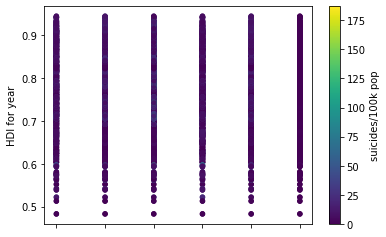

In [100]:
plot=master_df.dropna().plot.scatter(x='age',
                      y='HDI for year',
                      c='suicides/100k pop',
                      colormap='viridis')

## <font color=blue size=4> Question #4 For each of the attributes above, make a scatterplot and describe in detail how your each of the assigned attributes is correlated to the class attribute (for the purposes of this question, assume that HDI is your class attribute) (10 Points)</font>